In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
FILEPATH = r"C:\Users\micro\OneDrive\Documents\Netfilx\Netflix Dataset.csv"
df = pd.read_csv(FILEPATH)

for k, v in df.items():
    print('df: ' + k)
    print(v.head(15))


df: Show_Id
0      s1
1      s2
2      s3
3      s4
4      s5
5      s6
6      s7
7      s8
8      s9
9     s10
10    s11
11    s12
12    s13
13    s14
14    s15
Name: Show_Id, dtype: object
df: Category
0     TV Show
1       Movie
2       Movie
3       Movie
4       Movie
5     TV Show
6       Movie
7       Movie
8       Movie
9       Movie
10      Movie
11    TV Show
12    TV Show
13      Movie
14      Movie
Name: Category, dtype: object
df: Title
0        3%
1     07:19
2     23:59
3         9
4        21
5        46
6       122
7       187
8       706
9      1920
10     1922
11     1983
12     1994
13    2,215
14     3022
Name: Title, dtype: object
df: Director
0                      NaN
1        Jorge Michel Grau
2             Gilbert Chan
3              Shane Acker
4           Robert Luketic
5              Serdar Akar
6          Yasir Al Yasiri
7           Kevin Reynolds
8            Shravan Kumar
9             Vikram Bhatt
10            Zak Hilditch
11                     NaN
12

In [28]:
print("Preview of Dataset:")
print(df.head(5))

Preview of Dataset:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

           

In [ ]:
print(" Missing Values:")
print(df.isnull().sum())

 Missing Values:
show_id            0
category           0
title              0
director        2388
cast             718
country          507
release_date      10
rating             7
duration           0
type               0
description        0
dtype: int64


 Columns: ['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


C:\Users\micro\AppData\Local\Temp\ipykernel_21980\3119705975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='coolwarm')


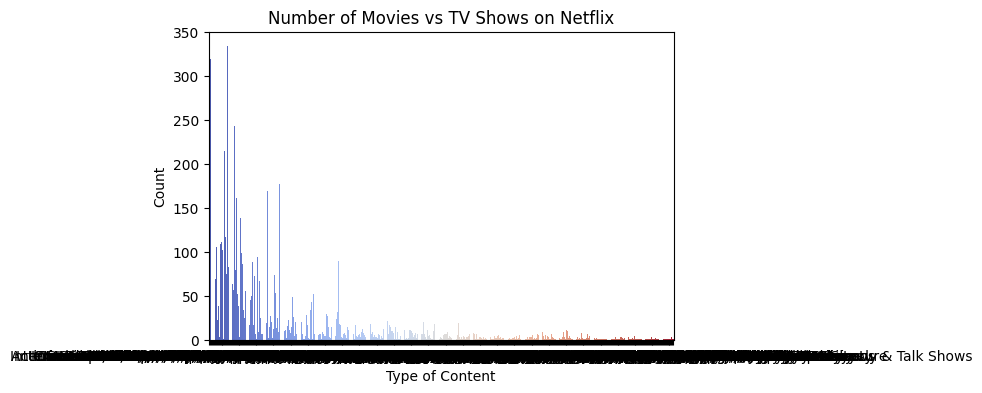

In [38]:
# Question 1️ : Which types of shows or movies are most common?
df.columns = df.columns.str.strip().str.lower()

print(" Columns:", df.columns.tolist())  # Check names

# Plot Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='coolwarm')
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()

Columns in dataset:
 ['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


C:\Users\micro\AppData\Local\Temp\ipykernel_21980\796239854.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='magma')


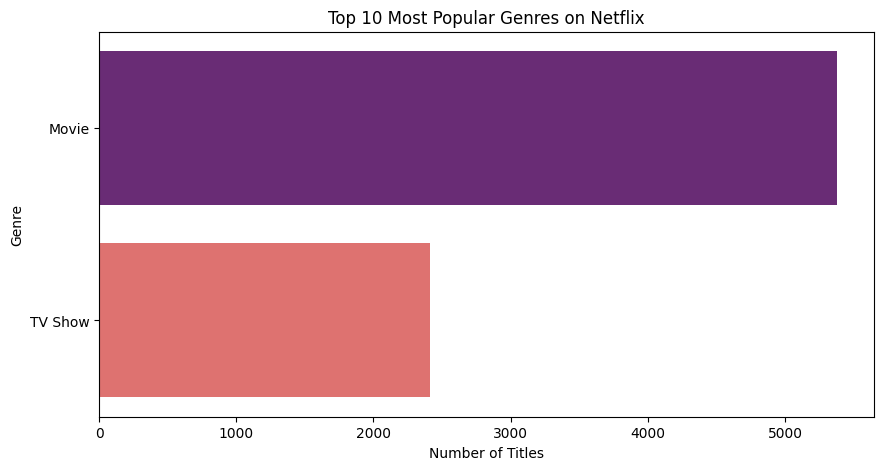

In [36]:
# Question 2️ : Which genres are popular?
# (Genres are stored in the 'listed_in' column)
# Clean up column names
df.columns = df.columns.str.strip().str.lower()
print("Columns in dataset:\n", df.columns.tolist())

#  Use correct column for genres
if 'listed_in' in df.columns:
    genre_col = 'listed_in'
elif 'genre' in df.columns:
    genre_col = 'genre'
elif 'category' in df.columns:
    genre_col = 'category'
else:
    raise ValueError("Genre column not found in dataset!")

# Create genre chart
genre_data = df[genre_col].dropna().str.split(',').explode().str.strip()
genre_count = genre_data.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='magma')
plt.title("Top 10 Most Popular Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

C:\Users\micro\AppData\Local\Temp\ipykernel_21980\3865291180.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette='viridis')


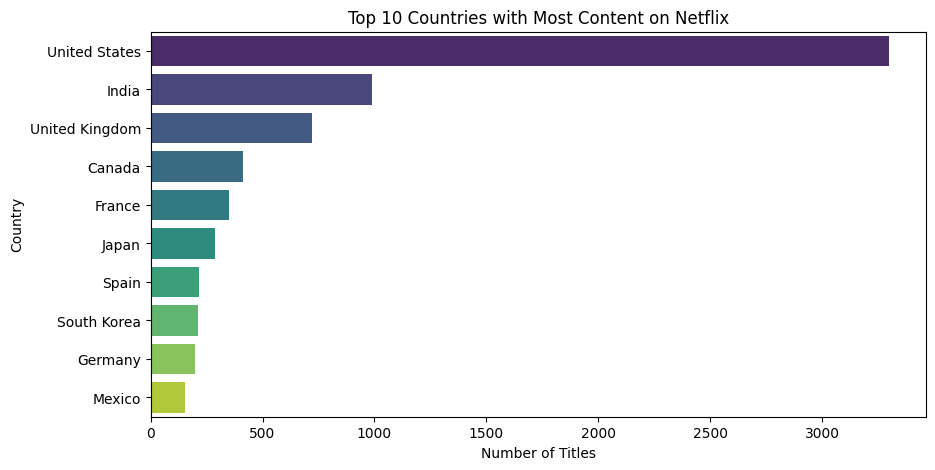

In [42]:
# Question 3️ : Which countries contribute the most content?
country_data = df['country'].dropna().str.split(',').explode().str.strip()
country_count = country_data.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_count.values, y=country_count.index, palette='viridis')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

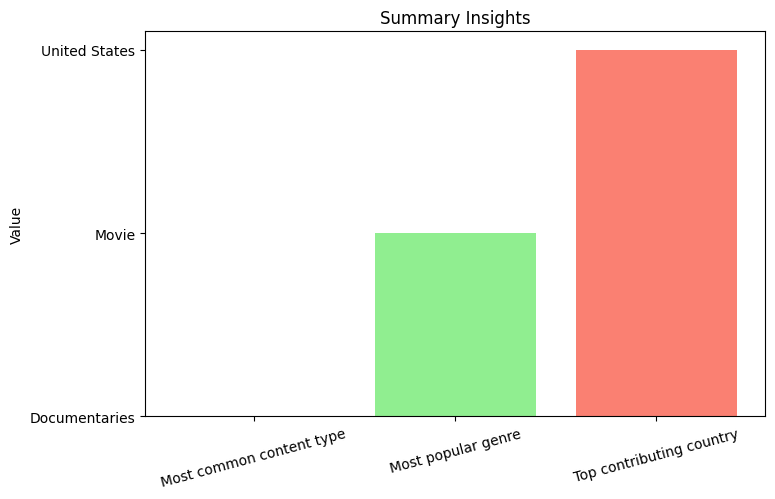

In [46]:
metrics = ["Most common content type", "Most popular genre", "Top contributing country"]
values = [df['type'].value_counts().idxmax(), genre_count.index[0], country_count.index[0]]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Summary Insights")
plt.ylabel("Value")
plt.xticks(rotation=15)
plt.show()


In [47]:
print("\n Summary Insights:")
print("Most common content type:", df['type'].value_counts().idxmax())
print("Most popular genre:", genre_count.index[0])
print("Top contributing country:", country_count.index[0])


 Summary Insights:
Most common content type: Documentaries
Most popular genre: Movie
Top contributing country: United States
